<a href="https://colab.research.google.com/github/01-KateC-01/gastrointestinal-mapping-using-GANs/blob/main/Objective%201/Objective_1_Image_Classifier_for_Fashion_MNIST_(Method_2_CNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Gastrointestinal Disease Mapping Using AI**
##**Objective 1: Image Classifier for Fashion MNIST (Method 2: CNN)**
---
> <p align = "justify">This objective aims to provide fundamental knoweledge on TensorFlow and Colab which are the prominent tools to be used in the project. In addition, should all cores tasks be completed, an image classifier will be used to complete a more detailed version of the AI system to be created. 
> Thus, in this notebook an image classifier for the Fashion MNIST Dataset is implemented.
---
 



###1-Library and Dataset Imports

In [ ]:
# TensorFlow and tf.keras
import tensorflow as tf
import datetime, os
import numpy as np
import matplotlib.pyplot as plt
import math

from tensorboard.plugins.hparams import api as hp
from tensorboard import notebook
from sklearn.metrics import plot_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix

print("TensorFlow Version Used: ",tf.__version__)

#Fashion MNIST Dataset
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

TensorFlow Version Used:  2.9.2
4422102/4422102 [==============================] - 0s 0us/step


####1.1-Exploring the Fashion MNIST Dataset

Upon loading the dataset there are 4 variables that are loaded into Colab:


1.   test_images
2.   test_labels
3.   train_images
4.   train_labels

In [ ]:
print( "Number of training Images: ", len(train_images))
print( "Number of testing Images: ", len(test_images))
print( "Testing Images Size: ", test_images.shape)

Number of training Images:  60000
Number of testing Images:  10000
Testing Images Size:  (10000, 28, 28)


<p align = "justify">Therefore, the images in the Fashion MNIST Dataset are 28X28 NumPy arrays and in gray scale. Where the pixel vlaues range from 0 to 255. 

The labels are an array of integers, ranging from 0 to 9:

| Label Number |   Class  |
|--------------|----------|
|      0       | T-shirt  |
|      1       | Trouser  |
|      2       | Pullover |
|      3       | Dress    |
|      4       | Coat     |
|      5       | Sandal   | 
|      6       | Shirt    |
|      7       | Sneaker  |
|      8       | Bag      |
|      9       |Ankle Boot|


In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Plotting an image from the dataset:

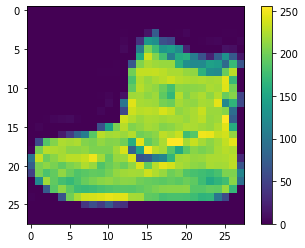

In [ ]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

❓❓❓Why do we need to do this❓❓❓

Scale these values to a range of 0 to 1 before feeding them to the neural network model. To do so, divide the values by 255. It's important that the training set and the testing set be preprocessed in the same way:

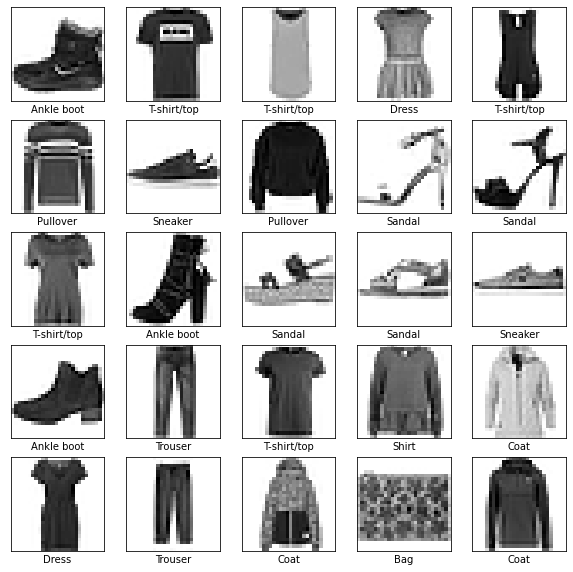

In [ ]:
train_images = train_images / 255.0

test_images = test_images / 255.0

# Verify that the previous step is correct by Plotting the first 25 images in the dataset

plt.figure(figsize=(10,10))

for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary) # Returns a normalized rgb array corresponding to the respective train image
    plt.xlabel(class_names[train_labels[i]])
plt.show()

###2-Building the Model

The model has 3 layers:

1. Flatten- transforms 2D array of 28X28 into a 1D array (unstacks rows of pixels in the image and lining them up)
2. Dense- dense layer with 128 nodes 
3. Dense- layer with 10 nodes, each with a score to represent a class to know what classification the model gives 

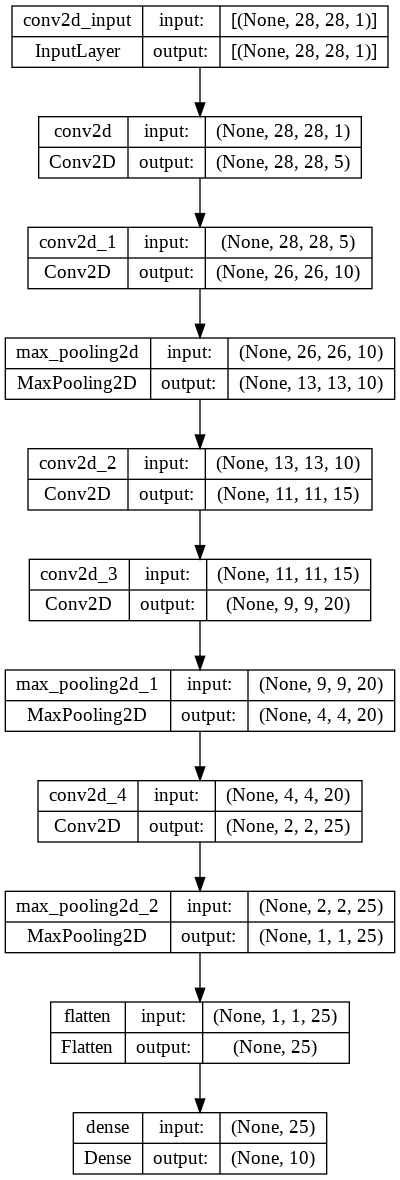

In [ ]:
model2 = tf.keras.Sequential([
    
    tf.keras.layers.Conv2D(filters=5, kernel_size=3, strides=1, padding="same", activation="relu",
                           input_shape=(28,28,1)), 
    tf.keras.layers.Conv2D(10,3, padding="valid", activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Conv2D(15,3, padding="valid", activation='relu'),
    tf.keras.layers.Conv2D(20,3, padding="valid", activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Conv2D(25,3, padding="valid", activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation="softmax") #Output layer

])

tf.keras.utils.plot_model(model2, show_shapes=True)

###3- Compiling the Model
Compiling settings to consider: 
1. **Loss function—** This measures how accurate the model is during training. You want to minimize this function to "steer" the model in the right direction.
2. **Optimizer—** This is how the model is updated based on the data it sees and its loss function.
3. **Metrics—** Used to monitor the training and testing steps. The following example uses accuracy, the fraction of the images that are correctly classified.

In [ ]:
model2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
log_dir="logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

tensorboard_callback2 = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)


hparams_callback2 = hp.KerasCallback(log_dir, {'num_relu_units': 512,
                                               'dropout': 0.2
                                    })

###4- Training the Model
4.1- Feed the training data to the model. In this example, the training data is in the train_images and train_labels arrays.

4.2- The model learns to associate images and labels.

####4.1 and 4.2- Feeding the Model & Model Learning

In [ ]:
model2.fit(train_images, train_labels, epochs=10, batch_size=32, callbacks=[tensorboard_callback2, hparams_callback2])
#model fits to training data

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1875/1875 [==============================] - 16s 3ms/step - loss: 0.6400 - accuracy: 0.7660
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4333 - accuracy: 0.8436
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3805 - accuracy: 0.8623
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3491 - accuracy: 0.8726
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3272 - accuracy: 0.8806
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3104 - accuracy: 0.8874
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2947 - accuracy: 0.8931
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2823 - accuracy: 0.8980
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2731 - accuracy: 0.8994
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2641 - accura

In [ ]:
#uploading tensorboard experiment
!tensorboard dev upload --logdir ./logs \
  --name "CNN Data Collection Experiment: Fashion MNIST Classifier" \
  --description "Training results from https://colab.research.google.com/drive/1XklN1Xy7NwK-er02kuskyxEJDgdN6b0H#scrollTo=bu8krmIpmxzG" \
  --one_shot

!tensorboard dev list


***** TensorBoard Uploader *****

This will upload your TensorBoard logs to https://tensorboard.dev/ from
the following directory:

./logs

This TensorBoard will be visible to everyone. Do not upload sensitive
data.

Your use of this service is subject to Google's Terms of Service
<https://policies.google.com/terms> and Privacy Policy
<https://policies.google.com/privacy>, and TensorBoard.dev's Terms of Service
<https://tensorboard.dev/policy/terms/>.

This notice will not be shown again while you are logged into the uploader.
To log out, run `tensorboard dev auth revoke`.

Continue? (yes/NO) yes

Please visit this URL to authorize this application: https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=373649185512-8v619h5kft38l4456nm2dj4ubeqsrvh6.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=openid+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email&state=PtZBe3GSPWHlzQYt2n61hmcORY1ZZP&prompt=consent&access_type=offline
Enter 

Final Training accuracy: 0.91 

Final Training Loss: 0.2379

###5-Model Evaluation

5.1-Accuracy Evaluation

5.2-Making Predictions

5.3-Verify Predictions

5.4-Confusion Matrix Plot

####5.1- Accuracy Evaluation

In [ ]:
test_loss, test_acc = model2.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


313/313 - 1s - loss: 0.3168 - accuracy: 0.8873 - 860ms/epoch - 3ms/step

Test accuracy: 0.8873000144958496


Testing accuracy: 0.88

Testing accuracy is slightly less than training accuracy --> There is **overfitting** 

#### 5.2- Making Predictions

A softmax layer is added to the model to convert the model's linear outputs—logits—to probabilities, which should be easier to interpret.

In [ ]:
probability_model = tf.keras.Sequential([model2, 
                                         tf.keras.layers.Softmax()])

predictions = probability_model.predict(test_images)

predictions[0]

313/313 [==============================] - 1s 2ms/step


array([0.08537836, 0.08537835, 0.08537835, 0.08537835, 0.08537835,
       0.08541588, 0.08537835, 0.0856213 , 0.08538289, 0.2313098 ],
      dtype=float32)

Predictions Example Output:

array([1.3835326e-08, 2.7011181e-11, 2.6019606e-10, 5.6872784e-11,
       1.2070331e-08, 4.1874609e-04, 1.1151612e-08, 5.7000564e-03,
       8.1178889e-08, 9.9388099e-01], dtype=float32) <br> <br>
A prediction is an array of 10 numbers. They represent the model's "confidence" that the image corresponds to each of the 10 different articles of clothing. You can see which label has the highest confidence value:

In [ ]:
print("Label the Model gives the highest confident value: ", class_names[np.argmax(predictions[0])])

Label the Model gives the highest confident value:  Ankle boot


Plotting Predictions:

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

####5.3- Verifying Predictions


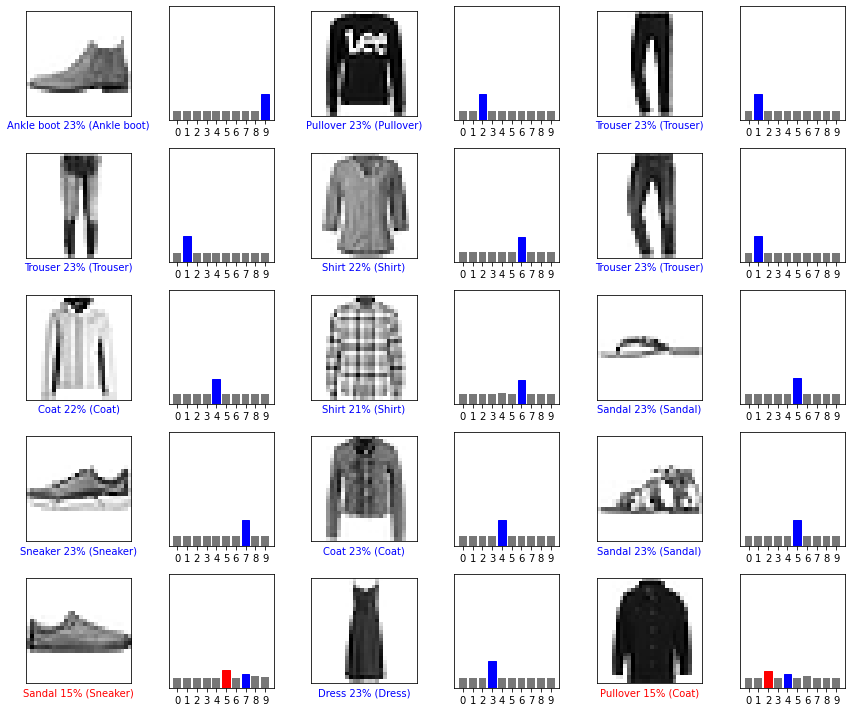

In [ ]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

####5.3.1- Exploring Predicitons 

(28, 28)
(1, 28, 28)
1/1 [==============================] - 0s 42ms/step
[[0.08534551 0.08533898 0.23193386 0.08533899 0.08534406 0.08533898
  0.08534139 0.08533898 0.08534019 0.08533898]]


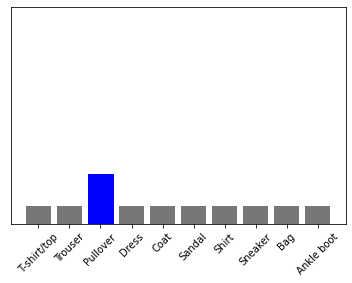

In [ ]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)
predictions_single = probability_model.predict(img)

print(predictions_single)

plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

####5.3.2- Confusion Matrix

313/313 [==============================] - 1s 2ms/step


Text(0.5, 1.0, 'Fashion MNIST Classifier (Method 2) Confusion Matrix')

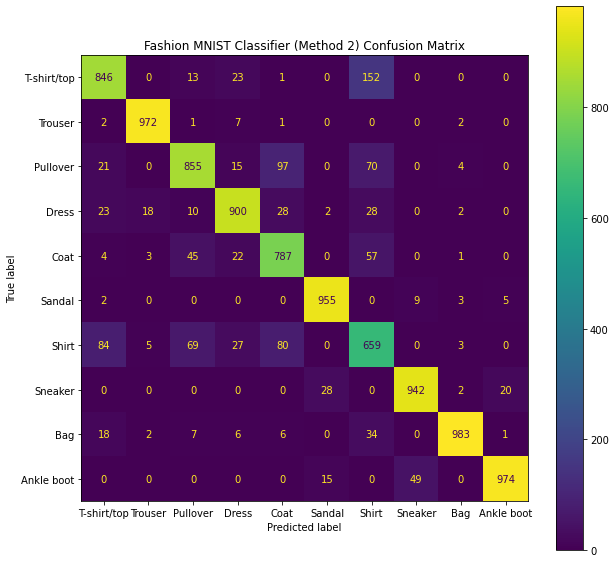

In [ ]:
loss, accuracy = model2.evaluate(test_images, test_labels)
probability_model = model2.predict(test_images)
#Convert prediction probabilities into integers
predictions = probability_model.argmax(axis=1)
#Confusion Matrix
cm = confusion_matrix (predictions,test_labels)
#Plot
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=class_names)
fig, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax);
plt.title("Fashion MNIST Classifier (Method 2) Confusion Matrix")